<a href="https://colab.research.google.com/github/vijaygwu/causal/blob/main/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is demonstrating a basic regression analysis using simulated data.

1. **Imports**: The code imports several Python libraries:
   - `numpy` for numerical operations
   - `pandas` for data manipulation
   - `statsmodels` for statistical modeling
   - `itertools.combinations` for generating combinations
   - `plotnine` for creating plots (a Python implementation of R's ggplot2)

2. **Setup for data loading**: There's a function `read_data` to load Stata files from a GitHub repository, and an SSL context modification to handle HTTPS connections.

3. **Data generation**:
   - Creates a DataFrame with 10,000 random samples from a normal distribution for variables 'x' and 'u'
   - Creates a dependent variable 'y' that equals 5.5 times 'x' plus 12 times 'u'
   - This simulates data where 'y' depends on 'x' with some noise introduced by 'u'

4. **Regression analysis**:
   - Fits an OLS (Ordinary Least Squares) regression model with 'y' as the dependent variable and 'x' as the independent variable
   - Generates a summary of the regression results with `reg_tb.summary()`

5. **Predictions and residuals**:
   - Calculates predicted values using the fitted model (`yhat1`)
   - Manually calculates predictions using specific coefficients (`yhat2`)
   - Calculates residuals (difference between actual and predicted values) in two ways

6. **Descriptive statistics**:
   - Generates summary statistics for all variables with `tb.describe()`

7. **Visualization**:
   - Creates a scatter plot of 'x' vs 'y'
   - Adds a regression line
   - Adds annotations displaying the intercept and slope values

The main purpose of this code is to demonstrate how linear regression works by:
1. Creating data with a known relationship (y = 5.5x + 12u)
2. Fitting a regression model to recover those parameters
3. Analyzing how well the model fits the data
4. Visualizing the relationship

The regression should recover a slope coefficient close to 5.5, though not exactly because of the random noise introduced by the 'u' term.

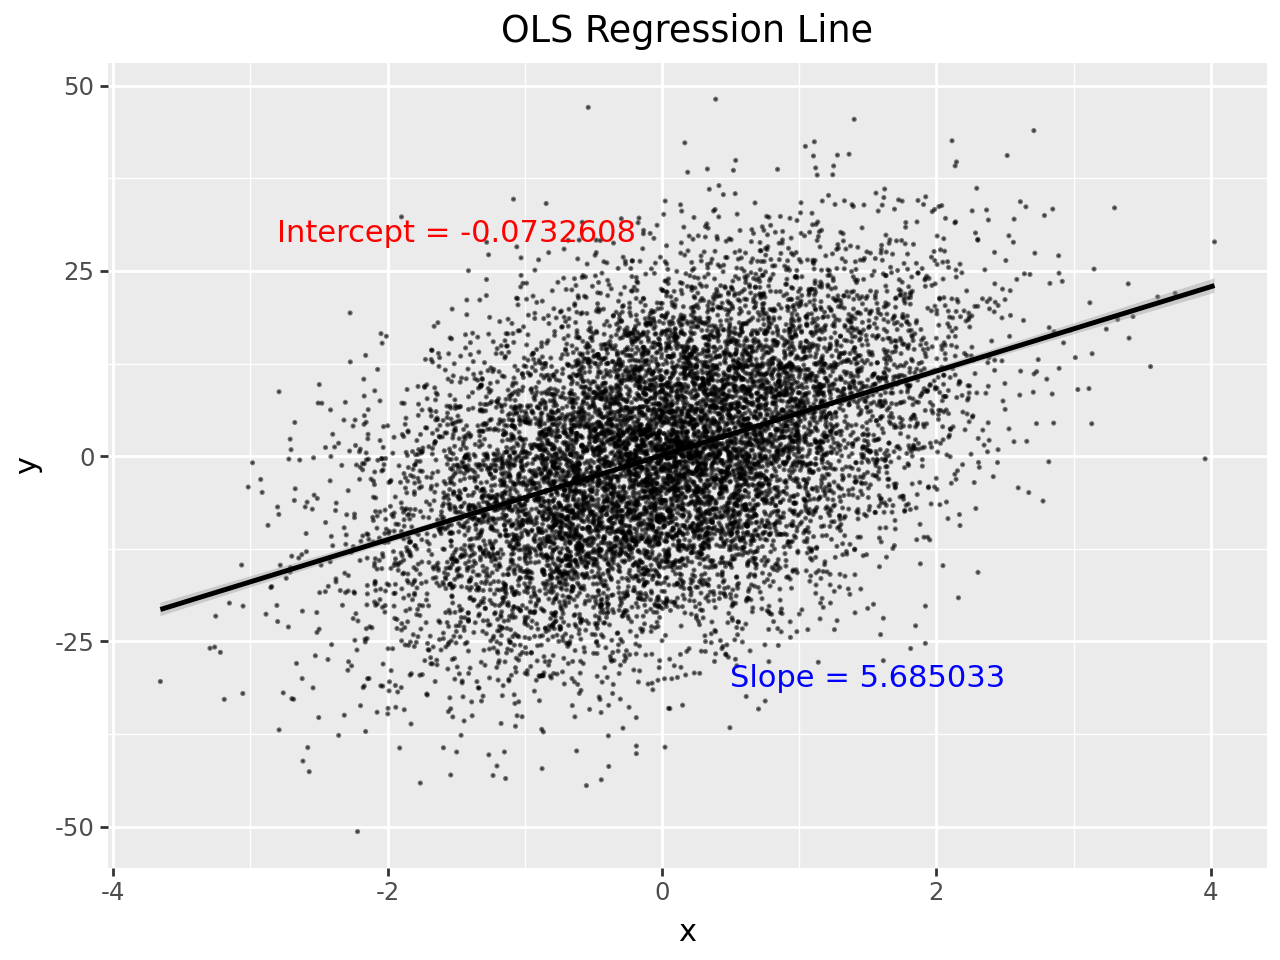

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

np.random.seed(1)

tb = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
tb['y'] = 5.5*tb['x'].values + 12*tb['u'].values

reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()
reg_tb.summary()


tb['yhat1'] = reg_tb.predict(tb)
tb['yhat2'] = 0.1114 + 5.6887*tb['x']
tb['uhat1'] = reg_tb.resid
tb['uhat2'] = tb['y'] - tb['yhat2']

tb.describe()

p.ggplot(tb, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.05, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red",
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue",
             label = "Slope = {}".format(5.685033))